In [968]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from sklearn.neighbors import KDTree

from main_copy2 import Branch, Individual, Field


* Use SAR
  * Find relation between number of species and area
* Use EAR
  * Find relation between number of extinctions and decreasing area

In [969]:
n_species = 10
t_min = -0.3
t_max = -0.01

In [970]:
for n in range(n_species):
    t = np.linspace(t_min, t_max, n_species)

alpha = list(map(lambda o: 2**o, t))
print(alpha)
species_alpha = [o for o in alpha for i in range(1)]

[np.float64(0.8122523963562356), np.float64(0.8305979534890165), np.float64(0.8493578639287523), np.float64(0.8685414862717363), np.float64(0.8881583904878002), np.float64(0.9082183626944031), np.float64(0.9287314100385485), np.float64(0.9497077656889639), np.float64(0.9711578939410341), np.float64(0.9930924954370359)]


In [971]:
m = 14
l = 2 ** m
l = 10
delta0 = 0.1
delta_diff = 8
d = 5
L_av = 20

In [972]:
grid = Field(
    species_alpha=species_alpha,
    m=m,
    l=l,
    delta0=delta0,
    delta_diff=delta_diff,
    d=d,
    L_av=20
)

In [973]:
species = grid.points
number_of_individuals = [len(species[i]) for i in range(len(species))]
for i in range(len(species)):
    print(f"Species {i} with alpha={round(species_alpha[i], 3)} has {number_of_individuals[i]} individuals.")

Species 0 with alpha=0.812 has 644 individuals.
Species 1 with alpha=0.831 has 2021 individuals.
Species 2 with alpha=0.849 has 1153 individuals.
Species 3 with alpha=0.869 has 2407 individuals.
Species 4 with alpha=0.888 has 708 individuals.
Species 5 with alpha=0.908 has 3522 individuals.
Species 6 with alpha=0.929 has 7124 individuals.
Species 7 with alpha=0.95 has 9851 individuals.
Species 8 with alpha=0.971 has 11810 individuals.
Species 9 with alpha=0.993 has 14502 individuals.


In [974]:
all_points = [p for species in grid.points for p in species]
x_coords = [p.x for p in all_points]
y_coords = [p.y for p in all_points]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
origin = ((x_min + x_max)/2, (y_min + y_max)/2)

print(x_min, x_max, y_min, y_max)

-9.980202223035494 10.000899108474568 -9.184843452703717 8.480337318854028


In [975]:
# for processed_points in grid.points:
#     x_scatter, y_scatter = zip(*map(lambda point: (point.x, point.y), processed_points))
#     plt.scatter(x_scatter, y_scatter)
#     plt.grid(True)
#     plt.show()
# # plt.savefig("./test.png")
# # plt.clf()

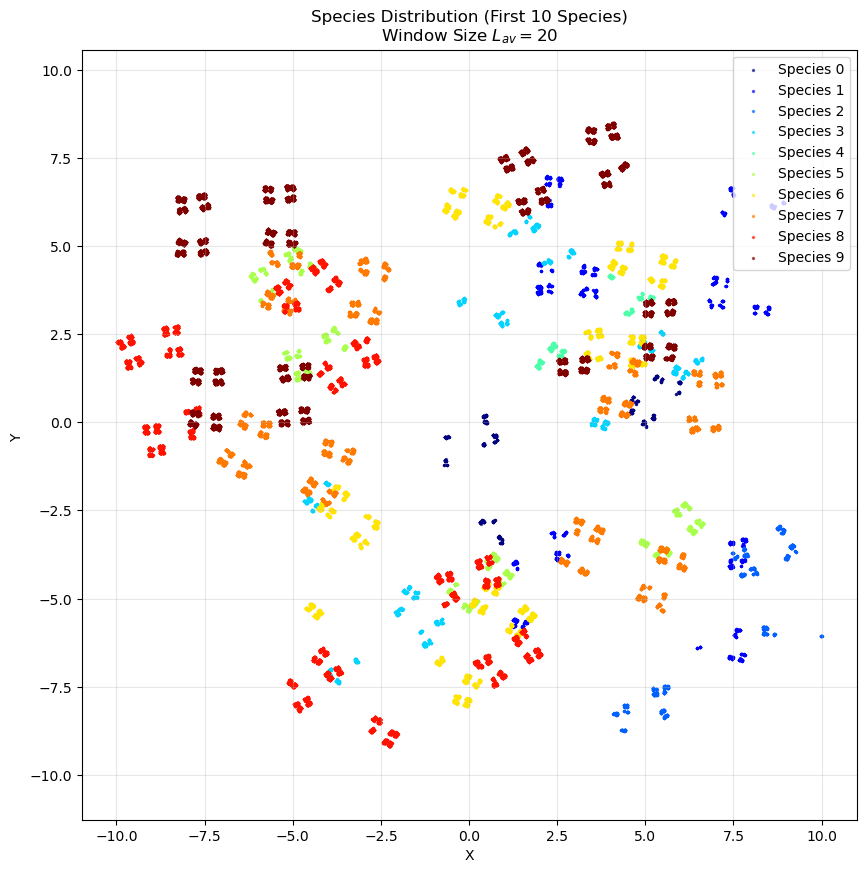

In [976]:
# plot species distribution (first 10 species)
plt.figure(figsize=(10, 10))
colors = plt.cm.jet(np.linspace(0, 1, 10))
for i in range(10):
    species = grid.points[i]
    xs = [p.x for p in species]
    ys = [p.y for p in species]  
    plt.scatter(xs, ys, s=2, alpha=0.6, label=f'Species {i}', color=colors[i])

plt.title(f"Species Distribution (First 10 Species)\nWindow Size $L_{{av}}={grid.L_av}$")
plt.xlabel("X")
plt.ylabel("Y ")
plt.axis('equal') 
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

In [977]:
# r_min = 0.5
# r_max = 50.0
# num_bins = 25
# r_bins = np.logspace(np.log10(r_min), np.log10(r_max), num_bins + 1)
# r_centers = 0.5 * (r_bins[:-1] + r_bins[1:])

In [978]:
# gs = grid.all_pair_correlation(r_bins, l * l)
# plt.clf()
# plt.loglog(r_centers, gs, 'o-')
# plt.xlabel("r")
# plt.ylabel("g(r)")
# plt.grid(True)
# plt.show()
# # plt.savefig("rho.png")

In [979]:
# r = l / (2 ** (m/2))
# r = 5.0


In [980]:
# s_c = grid.s(r_max)

In [981]:
# print(s_c)

Determine S_C (old)

In [982]:
r = 5.0

L_max = max(x_max - x_min, y_max - y_min)
L_list = np.logspace(np.log10(2*r), np.log10(L_max), 20)
A_list = [L**2 for L in L_list]

In [983]:
# S_list = []

# for L in L_list:
#     S_L = grid.s(r, L, origin)
#     S_list.append(S_L)

In [984]:
# S_matrix = np.empty((0, len(L_list)), dtype=object)
# counter = 0
# for _, species in enumerate(grid.points):
#     print(counter)
#     counter += 1
#     S_list = np.empty(0)
#     for L in L_list:
#         origin = ((min(p.x for p in species) + max(p.x for p in species))/2,
#                   (min(p.y for p in species) + max(p.y for p in species))/2)
#         S_list = np.append(S_list, grid.s(r, L, origin))
#     S_matrix = np.append(S_matrix, [S_list], axis=0)


In [985]:
# print(S_matrix)

In [986]:
# plt.figure()
# plt.loglog(A_list, S_list, 'o-')
# plt.xlabel(r"log($A$)")
# plt.ylabel(r"log($S_C$)")
# plt.grid(True)
# plt.show()


In [987]:
# # number of species within area A per alpha value
# for i, S_list in enumerate(S_matrix):
#     print(f"Alpha {i}:")
#     for S in range(len(A_list)):
#         print(f"  Area {round(A_list[S], 3)} : Species count {S_list[S]}")
        

In [988]:
# plt.figure(figsize=(6,5))

# for i, S_list in enumerate(S_matrix):
#     plt.plot(np.log10(A_list), np.log10(S_list), label=f'Alpha {i}')

# plt.xlabel(r"log10(A)")
# plt.ylabel(r"log10($S_c$)")
# plt.legend()
# plt.grid(True)
# plt.show()


Determine S_C (new)

In [989]:
r_min = 0.1
r_max = L_av / 2

In [990]:
# n_steps = 30
# R_values = np.logspace(np.log10(r_min), np.log10(r_max), n_steps)

# S_values = grid.species_area_curve(R_values, n_samples=2000)
# # get area from radius
# Area_values = np.pi * (R_values ** 2)
# plt.figure(figsize=(8, 6))
# plt.loglog(Area_values, S_values, 'o-', color='black', markersize=5, linewidth=1.5)

# # Add reference slope line
# mid_idx = len(Area_values) // 2
# ref_slope = 0.25 # to be adjusted
# ref_y = S_values[mid_idx] * (Area_values / Area_values[mid_idx])**ref_slope
# plt.loglog(Area_values, ref_y, 'r--', label='Ref Slope z=0.25', alpha=0.5)

# plt.xlabel(r"Sampling Area $A$ ($A = \pi R^2$)")
# plt.ylabel(r"Number of Species $S_C(A)$")
# plt.title("Species-Area Relationship (SAR)")
# plt.grid(True, which="both", ls="-", alpha=0.2)
# plt.legend()
# plt.show()

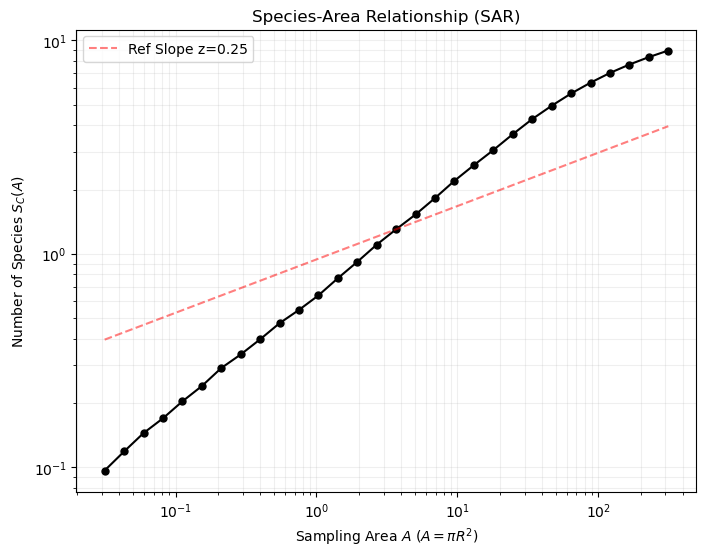

In [991]:
# plot Species-Area Relationship
n_steps = 30
R_values = np.logspace(np.log10(r_min), np.log10(r_max), n_steps)

S_values = grid.species_area_curve(R_values, n_samples=2000)
# get area from radius
Area_values = np.pi * (R_values ** 2)
plt.figure(figsize=(8, 6))
plt.loglog(Area_values, S_values, 'o-', color='black', markersize=5, linewidth=1.5)

# Add reference slope line
mid_idx = len(Area_values) // 2
ref_slope = 0.25 # to be adjusted
ref_y = S_values[mid_idx] * (Area_values / Area_values[mid_idx])**ref_slope

plt.loglog(Area_values, ref_y, 'r--', label='Ref Slope z=0.25', alpha=0.5)

plt.xlabel(r"Sampling Area $A$ ($A = \pi R^2$)")
plt.ylabel(r"Number of Species $S_C(A)$")
plt.title("Species-Area Relationship (SAR)")
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.show()


Extinction-Area Relationship

In [992]:
# def determine_q(q_try, fractional_area, initial_species_count):
#     lhs = fractional_area * initial_species_count
#     # lhs = np.full_like(q_try, lhs)
#     rhs = (q_try / (1 - q_try)) - ((initial_species_count + 1) * q_try ** (initial_species_count + 1)) / (1 - q_try ** (initial_species_count + 1))
#     root_find = lhs - rhs

#     y_closest = np.min(np.abs(root_find))
#     q_closest = q_try[np.argmin(np.abs(root_find))]
#     # print(f"Closest value to zero is {y_closest} at q={q_closest}")

#     # plt.figure()
#     # plt.plot(q_try, root_find)
#     # plt.xlabel('q')
#     # plt.ylabel('Value')
#     # plt.grid(True)
#     # plt.ylim(-10, 10)
#     # plt.show()

#     return q_closest

In [993]:
# Root finding function for q, bisection method

def function(q, fractional_area, initial_species_count):
    lhs = fractional_area * initial_species_count
    rhs = (q / (1 - q)) - ((initial_species_count + 1) * q ** (initial_species_count + 1)) / (1 - q ** (initial_species_count + 1))
    return lhs - rhs

def q_bisection(a, b, epsilon, fractional_area, initial_species_count):
    f_a = function(a, fractional_area, initial_species_count)
    f_b = function(b, fractional_area, initial_species_count)

    # Check condition for bisection method
    if f_a * f_b > 0:
        return print("Bisection method fails.")
    
    # Middle point
    c = (a + b) / 2.0
    f_c = function(c, fractional_area, initial_species_count)

    while abs(f_c) > epsilon:
        c = (a + b) / 2.0
        f_c = function(c, fractional_area, initial_species_count)
        f_a = function(a, fractional_area, initial_species_count)

        if f_c * f_a < 0:
            b = c
        else:
            a = c
            
    return c

In [994]:
def extinction_probability(a, q, n_c, n_0):
    # print(a, q, n_c, n_0)
    return (q ** (n_c + 1) - 1) / (q ** (n_0 + 1) - 1)

In [995]:
q_try = np.linspace(0, 1.01, 100000)
n_individuals = 15569
area_original = Area_values[-1]

a = 0
b = 1.01
epsilon = 1e-6

# critical_abundance = np.linspace(0, 1000, 11)
critical_abundance = np.array([0, 25, 50, 100, 500, 1000])

q_array = np.empty(len(critical_abundance), dtype=object)
extinction_prob_array = np.empty(len(critical_abundance), dtype=object)

for j in range(len(critical_abundance)):
    q = np.empty(len(Area_values) - 1)
    extinction_probabilities = np.empty(len(Area_values) - 1)

    for i in range(0, len(Area_values) - 1):
        area = Area_values[i]
        fractional_area = area / area_original
        q_value = q_bisection(a, b, epsilon, fractional_area, n_individuals)
        q[i] = q_value
        # print(f"Area: {area}, Fractional Area: {fractional_area}, q: {q_value}")
        extinction_probabilities[i] = extinction_probability(a = fractional_area,
                                                        q = q_value,
                                                        n_c = critical_abundance[j],
                                                        n_0 = n_individuals)
    q_array[j] = q
    extinction_prob_array[j] = extinction_probabilities

# area_shrunk = Area_values[25]
# fractional_area = area_shrunk / area_original
# # n_individuals = len(all_points)
# print(area_shrunk, area_original)
# print(fractional_area, n_individuals)
# print(f"Initial area = {area_original}, Shrunk area = {area_shrunk}, Fractional area = {fractional_area}, Initial species count = {n_individuals}")
# q = determine_q(q_try, fractional_area, n_individuals)
# print(q)

In [996]:
# for i in range(len(Area_values) - 1):
#     print(f"Area: {Area_values[i]}, q_value = {q[i]}, Extinction Probability: {extinction_probabilities[i]}")

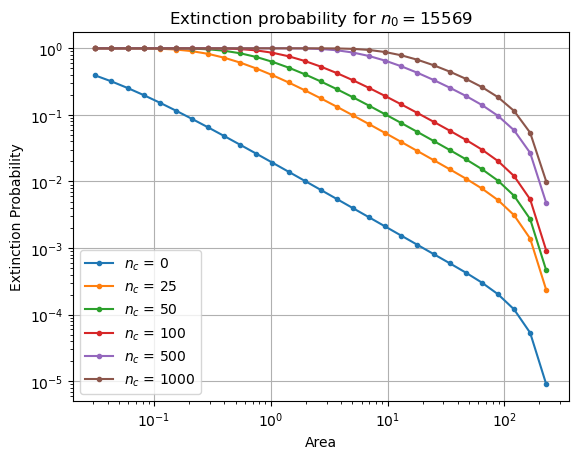

In [997]:
plt.figure()
for i in range(len(critical_abundance)):
    plt.plot(Area_values[:-1], extinction_prob_array[i], 'o-', label=fr'$n_c$ = {critical_abundance[i]}', markersize=3)

# plt.plot(Area_values[:-1], extinction_probabilities, 'o-', label='Extinction Probability', markersize=3)
# plt.plot(Area_values[:-1], q, 'o-', label='q', markersize=3)
plt.legend()
plt.xlabel("Area")
plt.ylabel("Extinction Probability")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.title(fr"Extinction probability for $n_0 = {n_individuals}$")
plt.show()

Extinction probabilities with $n_c = 1000$, for different alphas.

In [998]:
critical_abundance = 500

q_array = np.empty(n_species, dtype=object)
extinction_prob_array = np.empty(n_species, dtype=object)

for j in range(n_species):
    n_individuals = len(grid.points[j])
    q = np.empty(len(Area_values) - 1)
    extinction_probabilities = np.empty(len(Area_values) - 1)

    for i in range(0, len(Area_values) - 1):
        area = Area_values[i]
        fractional_area = area / area_original
        q_value = q_bisection(a, b, epsilon, fractional_area, n_individuals)
        q[i] = q_value
        # print(f"Area: {area}, Fractional Area: {fractional_area}, q: {q_value}")
        extinction_probabilities[i] = extinction_probability(a = fractional_area,
                                                        q = q_value,
                                                        n_c = critical_abundance,
                                                        n_0 = n_individuals)
    
    q_array[j] = q
    extinction_prob_array[j] = extinction_probabilities

/var/folders/sm/zzkn0_vx4lgfx1sffx1s_5yr0000gp/T/ipykernel_72352/3765103852.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10**3)


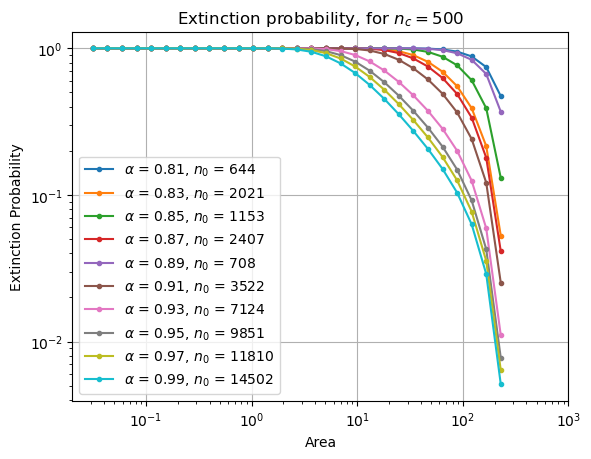

In [999]:
plt.figure()
for i in range(n_species):
    plt.plot(Area_values[:-1], extinction_prob_array[i], 'o-', label=fr'$\alpha$ = {round(species_alpha[i], 2)}, $n_0$ = {number_of_individuals[i]}', markersize=3)

# plt.plot(Area_values[:-1], extinction_probabilities, 'o-', label='Extinction Probability', markersize=3)
# plt.plot(Area_values[:-1], q, 'o-', label='q', markersize=3)
plt.legend()
plt.xlabel("Area")
plt.ylabel("Extinction Probability")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0, 10**3)
plt.title(fr"Extinction probability, for $n_c = {critical_abundance}$")
plt.show()

For specific alpha, look at different species